<a href="https://colab.research.google.com/github/pablillo77/data_science_coder/blob/main/Proyecto_ParteIII_Gimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

---

**Título: Exploración del dataset de Kaggle sobre Diabetes, basado en "Determinants of Gestational Diabetes Pedigree Function for Pima Indian Females" para comprender la distribución y relaciones en un conjunto de datos multidimensional e intentar predecir el desarrollo de la enfermedad**

**Resumen:**
Este estudio presenta una exploración de un dataset multidimensional basado en información del National Institute of Diabetes and Digestive and Kidney Diseases.El objetivo es comprender su estructura, distribución y posibles relaciones entre variables y explorar su posible utilidad en la predicción del desarrollo de la enfermedad (Diabetes Gestacional). Es relevante en términos de salud pública y está dirgido a profesionales del área de salud e investigadores.Se tiene presente que es un conjunto particular de población de mujeres de una etnia de India. Se utilizó un enfoque de análisis descriptivo y visualización de datos para examinar un conjunto de datos compuesto por información de parámetros que pueden incidir o no en el desarrollo de Diabetes, una funcion de scoring y un Outcome (Diabetes/No diabetes). Inicialmente, se realizó una exploración de la estructura del dataset, revelando un total de 768 observaciones y 9 variables. Posterior a la limpieza de los datos se mantuvieron 394 instancias. Se calcularon estadísticas descriptivas para cada variable, se analizaron valores extremos, los métodos en la sección exploratoria incluyeron KMeans, buscando patrones no evidentes dentro del conjunto de datos. Posteriormente se demuestra que es posible reducir la dimensionalidad de los datos realizando un análisis de componentes principales y luego aplicar y comparar la efectividad de algoritmos de clasificación K-Nearest Neighbours y regresión logística.

Además, se llevaron a cabo visualizaciones univariadas y multivariadas para explorar la distribución de variables individuales y las relaciones entre pares de variables. Se identificaron valores atípicos en el dataset para variables como la insulina, los cuales serán objeto de un análisis más detallado en investigaciones posteriores. Se observaron también relaciones significativas entre ciertas variables, como se evidenció en la matriz de correlación y en las visualizaciones de datos multivariados. No se evidenció que la DPF (función de pedigree de diabetes) tenga una relación fuerte en el Outcome, otros trabajos indican que debería incorporar más factores en su cálculo.

En conjunto, estos resultados proporcionan una comprensión inicial de la estructura y la naturaleza de los datos, lo que servirá como base para análisis más avanzados y la construcción de modelos predictivos en investigaciones futuras. La reducción de dimensionalidad fue efectiva, ya que las 2 primeras componentes principales, explican el 97% de la varianza. La exploración agrupando en clusters permitió entender mejor los tipos de pacientes y el resultado. Por último el algoritmo de clasificación que mejores resultados arrojó fue la regresión logistica entre los comparados.

---

Este abstract ofrece una visión general de los pasos y resultados clave obtenidos durante la exploración del dataset, lo que permite a los lectores, esperablemente, comprender la naturaleza y el alcance del estudio.

Fuente: https://github.com/pablillo77/data_science_1/blob/main/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf

# Preguntas e hipótesis inciales
* 1) Estudiar la relación entre las variables, por ejemplo entre Insulina y
Glucosa. La insulina es la hormona que permite que la glucosa en sangre entre a las células, cuando la persona presenta glucemia elevada de manera anormal, valores anormalmente altos de insulina en ayunas (>25 uU/ml) pueden indicar resistencia a la insulina y aumenta las chances de desarrollar diabetes de tipo 2. Si la glucemia es elevada pero la insulina no, puede ser una indicación de qu el páncreas ya no alcanza a compensarlo y se puede desarrollar diabetes de tipo 1.

* 2) Investigar y ampliar correlaciones con las otras variables del dataset. El indice de masa corporal BMI, suele ser un predictor de sindrome metabólico y puede aumentar las chances de desarrollar diabetes.

* 3) Investigar  si se encuentran correlaciones fuertes entre las variables, si existe redundancia y si es factible aplicar algún método para reducir la dimensionalidad del dataset como PCA y quedarnos con combinaciones que expresen la maxima variabilidad de los datos.

* 4) Separar en grupos de características similares si es que existen para entender hay distintos "grados" de enfermedad en la muestra del dataset. Cuestionar y evaluar la utilidad de la DPF (función de pedigree de diabetes)

* 5) Demostrar la existencia de un algoritmo de clasificación adecuado comparando metricas de los modelos

# 1 - Análisis Exploratorio de Datos (EDA)

## A continuación se agregan las definiciones de los campos:
  Pregnancies: Expresa la cantidad de embarazos

  Glucose: Nivel de glucosa en sangre en ayunas en mg/dl

  BloodPressure: Presión diastólica en mmHg

  SkinThickness: Espesor de la piel en el ticeps en mm

  Insulin: Nivel de insulina en sangre en uU/ml

  BMI: Indice de masa corporal, es la altura dividida el peso elevado al cuadrado. La altura expresada en metros y el peso en kg.

  DiabetesPedigreeFunction: Parametro que expresa la probabilidad de un individuo de desarrollar diabetes, basado en su edad e historia familiar. Varía entre 0,08 y 2,42
  Age: Edad

Outcome: Para expresar el resultado final 1: diabetes 0: sin diabetes

In [1]:
#Importo librerías a utilizar en esta sección

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
#Carga del dataset en formato csv desde mi github pasandole la url la método .read_csv()

url = 'https://raw.githubusercontent.com/pablillo77/data_science_1/main/diabetes.csv?token=GHSAT0AAAAAACQE62MIG6B5QH4AC6SJPM6CZQDEJOQ'
df = pd.read_csv(url)


In [3]:
#Selecciono un style sheet para matplotlib

mpl.style.use('ggplot')

##Estructura y resumen estadístico

In [4]:
print("Las columnas del dataset son: ")
df.columns #obtengo lista de columnas

Las columnas del dataset son: 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe() #estadísticas básicas del dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Imprimo las dimensiones e información del dataset original

print("Las dimensiones del dataset son: \n")
print(df.shape)
print("Los tipos de datos del dataset son: \n")
print(df.info())



Las dimensiones del dataset son: 

(768, 9)
Los tipos de datos del dataset son: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Conceptualmente, Outcome y Pregnancies si bien eson de tipo entero, están actuando como variables categórica. La redefinieremos en ese sentido. El consumo de memoria es muy bajo, sólo 54 KB.

In [7]:
df.Pregnancies=df.Pregnancies.astype('category') #redefino los tipos de Pregnancies y Outcome como categóricas.
df.Outcome=df.Outcome.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 44.4 KB


In [8]:
df.describe(include='category') #verificamos que hay 2 tipos de outcome y 17 "valores de embarazos" posibles en el dataset.

,Pregnancies,Outcome
count,768,768
unique,17,2
top,1,0
freq,135,500


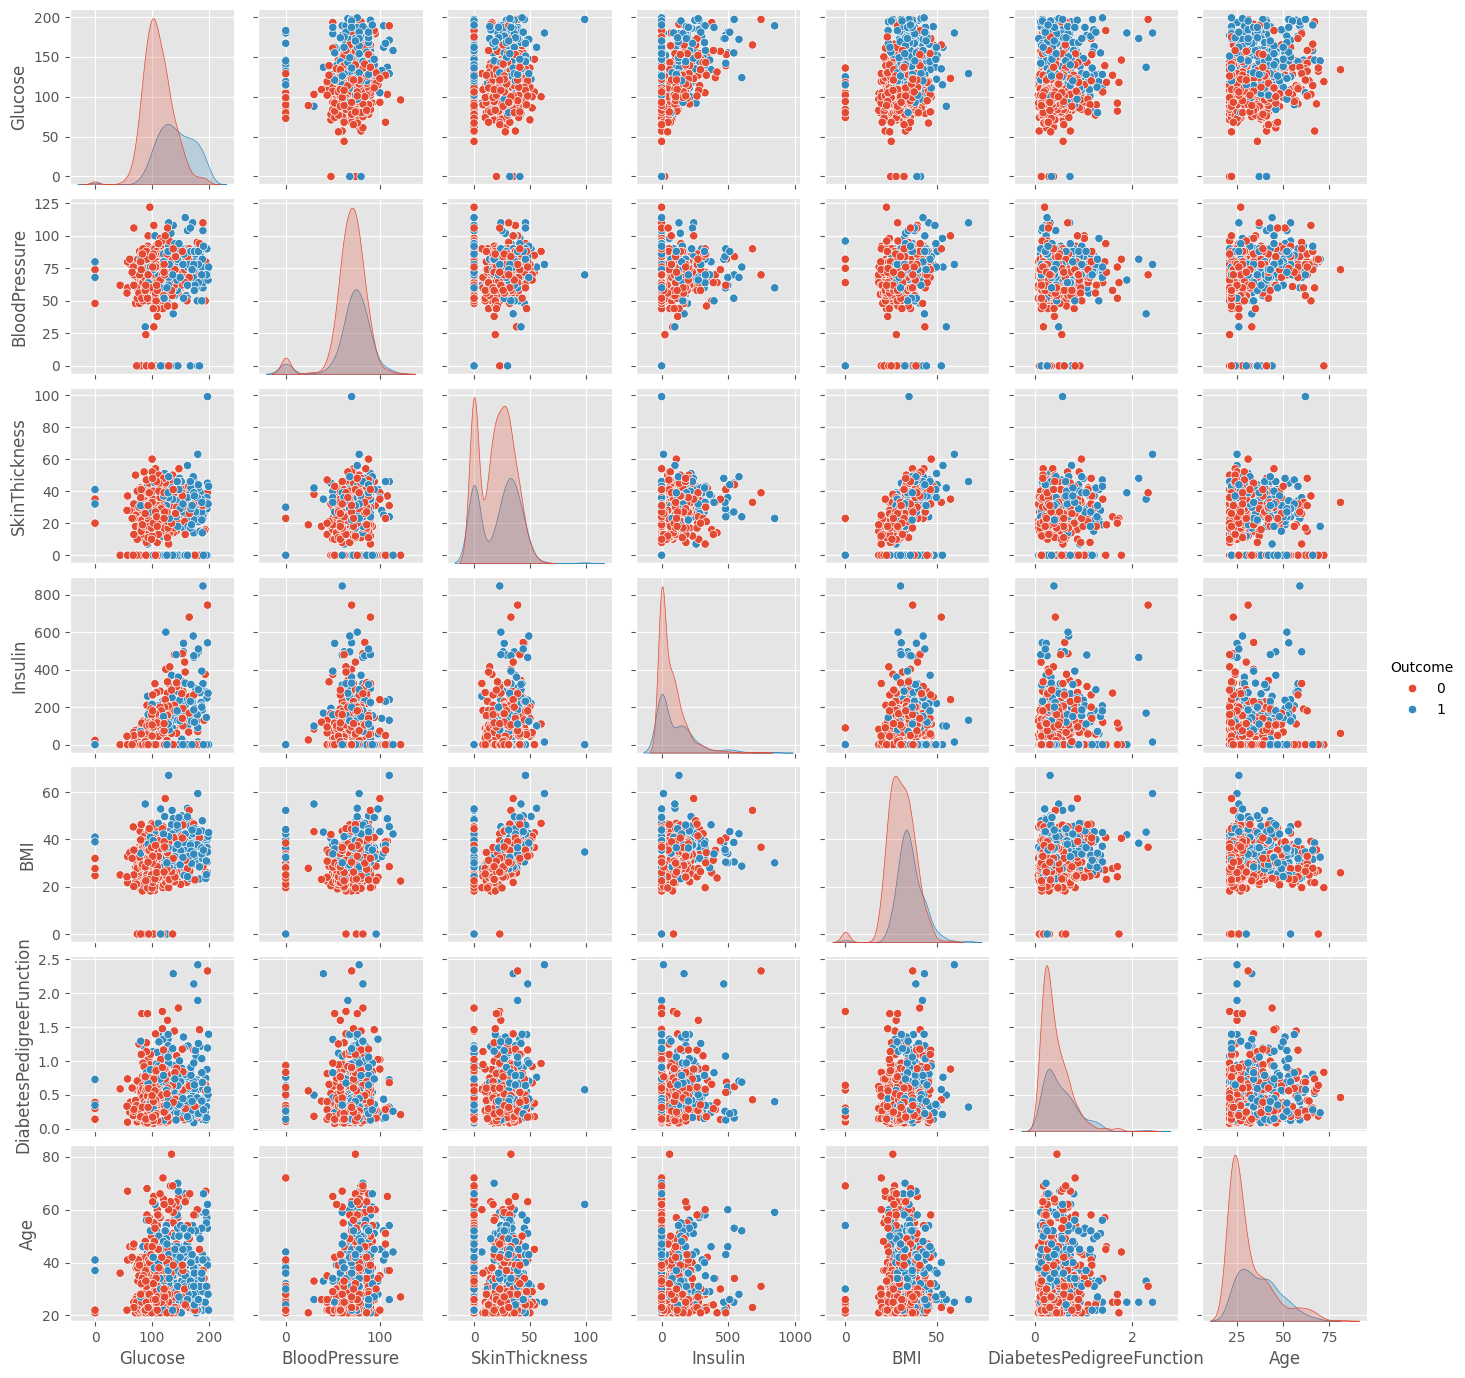

In [9]:
# Utilizo un pairplot para entender rápidamente las interrelaciones entre variables
# (Demora unos 30 segundos!)
sns.pairplot(df, hue='Outcome', height=2)
plt.show()

## Análisis de datos faltantes
Se evidencian valores en "0" que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procede a reemplazarlos por NaN para su posterior análisis.

In [10]:
df_nan = df.copy(deep=True) #creo una copia para mantener el original
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]] = \
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]].replace(to_replace=0, value=np.nan) #utilizo el método replace para cambiar los ceros por nan



In [11]:
print(df_nan.isna().sum()) #valores con su conteo de NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
# Calcular el coeficiente de variación (CV) para las variables
# Está constituido por el desvio estándar dividido por la media multiplicado por 100 para hacerlo porcentual, nos da una idea de si la media es representativa del conjunto de datos o no.
# CV < 30 % los datos son homogéneos y la media es representativa

coef_var = (df_nan["Glucose"].std() / df_nan['Glucose'].mean() *100).round(2)
print("El coeficiente de variación para la glucosa es:\n",coef_var)
coef_var = (df_nan["Insulin"].std() / df_nan['Insulin'].mean() *100).round(2)
print("El coeficiente de variación para la insulina es:\n",coef_var)
coef_var = (df_nan["SkinThickness"].std() / df_nan['SkinThickness'].mean() *100).round(2)
print("El coeficiente de variación para la SkinThickness es:\n",coef_var)
coef_var = (df_nan["BMI"].std() / df_nan['BMI'].mean() *100).round(2)
print("El coeficiente de variación para la BMI es:\n",coef_var)
coef_var = (df_nan["BloodPressure"].std() / df_nan['BloodPressure'].mean() *100).round(2)
print("El coeficiente de variación para la BloodPressure es:\n",coef_var)

El coeficiente de variación para la glucosa es:
 25.09
El coeficiente de variación para la insulina es:
 76.36
El coeficiente de variación para la SkinThickness es:
 35.94
El coeficiente de variación para la BMI es:
 21.34
El coeficiente de variación para la BloodPressure es:
 17.1


## Estrategia de reemplazo de datos faltantes
Entendemos que de los valores con datos faltantes, Glucose, BMI y BloodPressure presentan una distribución simétrica. Se utilizará entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN para no distorsionar el análisis.

In [13]:
df_nan["Glucose"].fillna(df_nan["Glucose"].mean(), inplace=True) #reemplazo nos nan de "Glucose" por su media
df_nan["BloodPressure"].fillna(df_nan["BloodPressure"].mean(), inplace=True) #reemplazo los nan de "BloodPressuere" por su media
df_nan["BMI"].fillna(df_nan["BMI"].mean(), inplace=True) #reemplazo los nan de "BloodPressuere" por su media
print(df_nan.isna().sum()) #checkeo imprimiendo la suma de los nan como va quedando

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
df_nan=df_nan.dropna() #llamo "df_nan" al df sin nans
print(df_nan.isna().sum())
df_nan.shape #verifico que quedamos ahora con 394 filas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(394, 9)

##Conteo agrupado por tipo de paciente (datos limpios)

Outcome
0    264
1    130
Name: count, dtype: int64

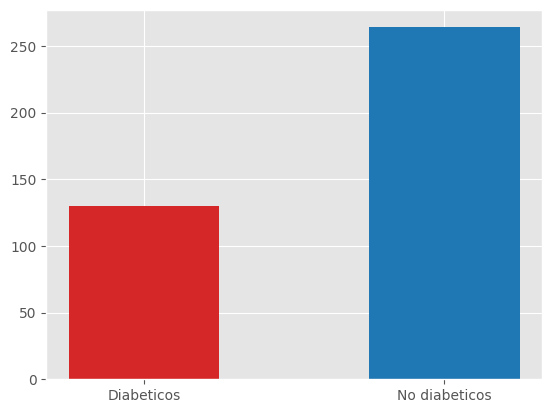

In [22]:
# Este código genera un gráfico de barras con el conteo de 1s y 0s de la
# Columna "Outcome". Counts es una lista con los valores de los conteos.

fig, ax = plt.subplots()
counts = [df_nan['Outcome'].value_counts()[1], df_nan["Outcome"].value_counts()[0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(["Diabeticos","No diabeticos"], counts, label=bar_labels, color=bar_colors, width=0.5)
df_nan['Outcome'].value_counts()


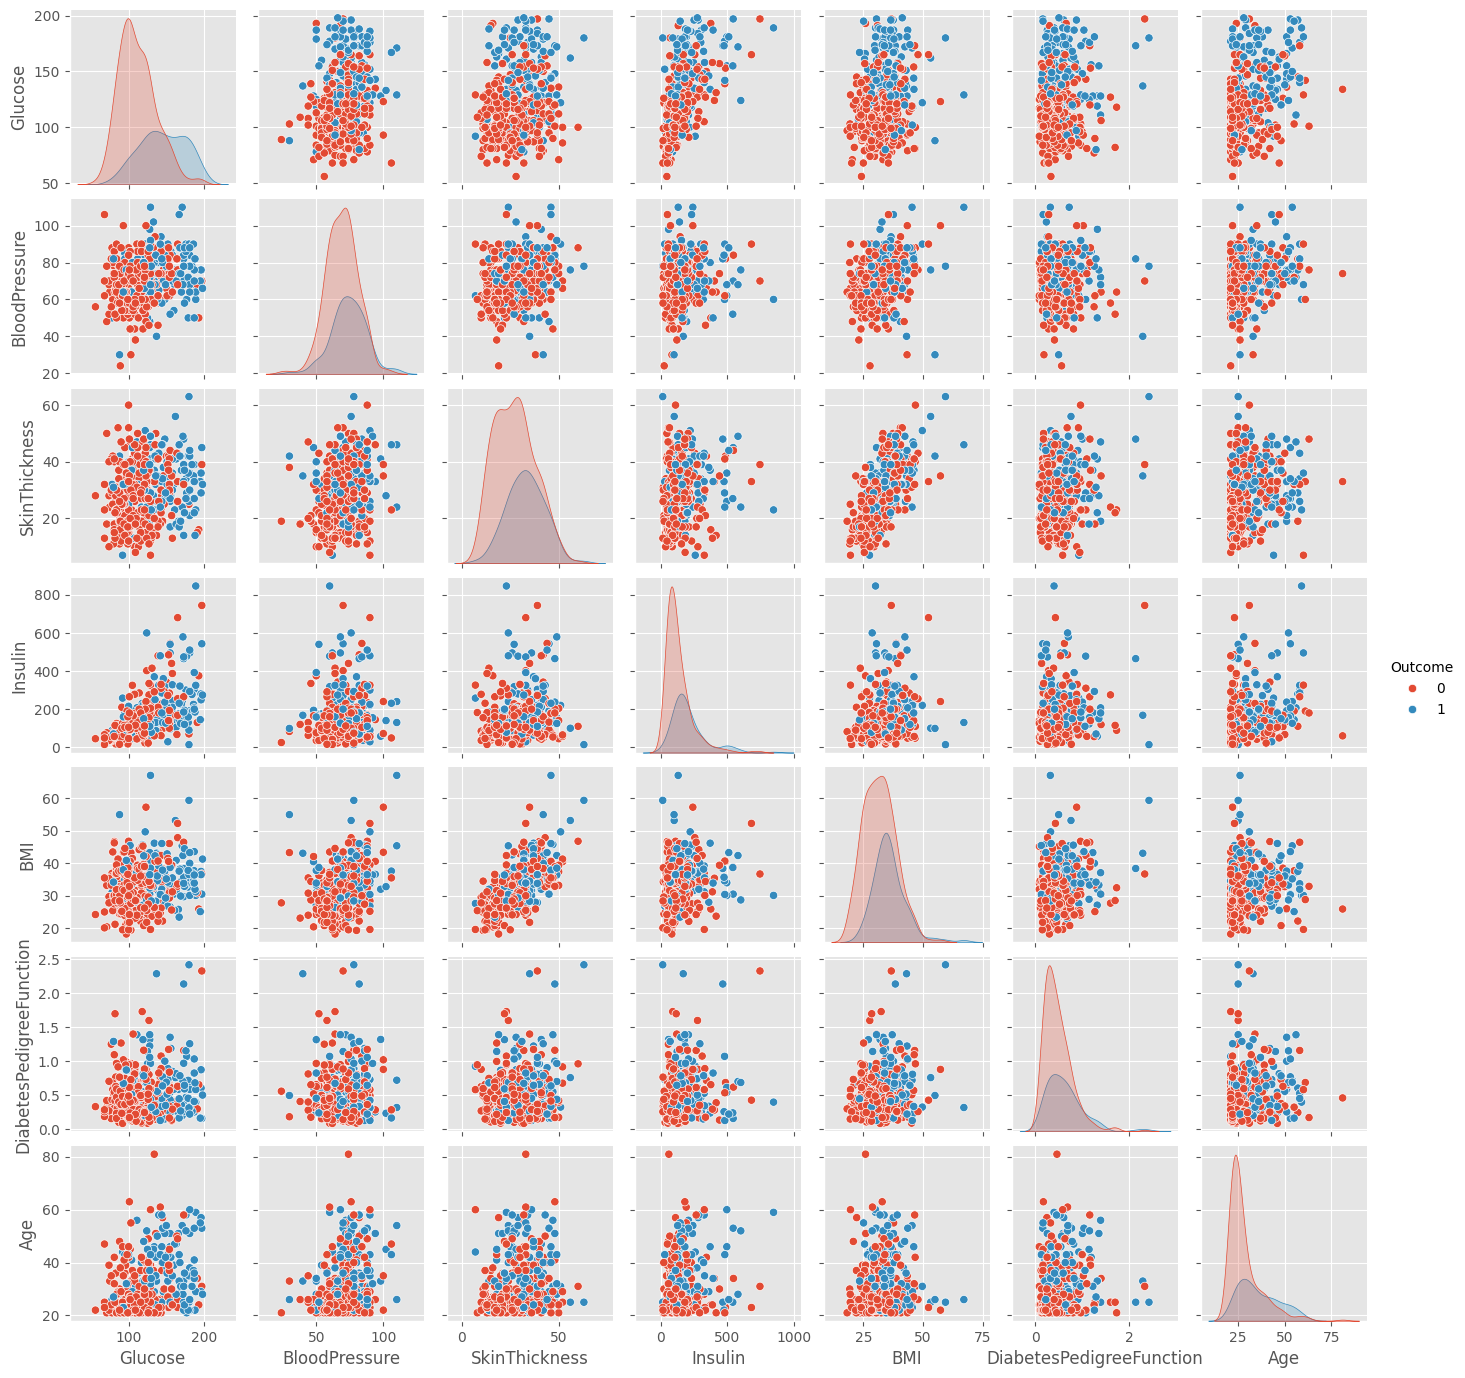

In [17]:
# Realizo otro pairplot post limpieza de los datos.
sns.pairplot(df_nan, hue='Outcome', height=2)
plt.show()

##Matriz de correlación

<Axes: >

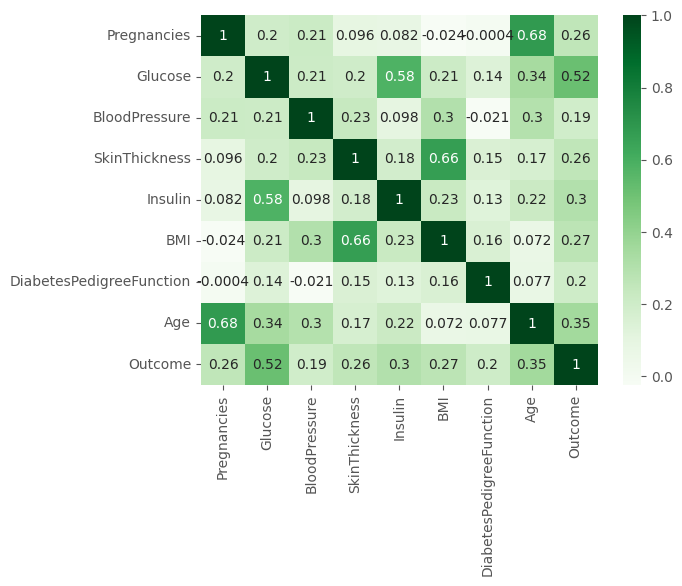

In [18]:
matrix = df_nan.corr() #matriz de correlación

sns.heatmap(matrix, cmap="Greens", annot=True) #la grafico con seaborn

## Visualización de algunos datos multivariados de ejemplo.

Text(0, 0.5, 'Insulina (uU/ml)')

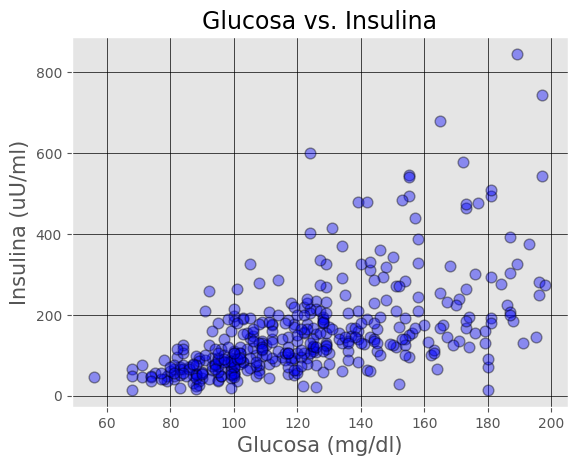

In [19]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5) #defino una grilla de color negro
ax.scatter(df_nan["Glucose"], df_nan["Insulin"], alpha=0.4, facecolor="blue", linewidths=1, s=60, edgecolor="k") #scatterplot puntos azules, bordes negros, transparencia
ax.set_title('Glucosa vs. Insulina', fontsize=17) #títulos y labels con ajuste del font
ax.set_xlabel('Glucosa (mg/dl)', fontsize=15)
ax.set_ylabel('Insulina (uU/ml)', fontsize=15)


Text(0, 0.5, 'BMI')

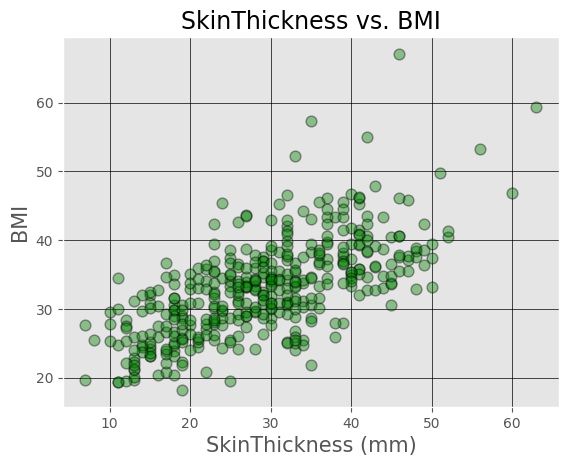

In [20]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["SkinThickness"], df_nan["BMI"], alpha=0.4, facecolor="green", linewidths=1, s=60, edgecolor="k")
ax.set_title('SkinThickness vs. BMI', fontsize=17)
ax.set_xlabel('SkinThickness (mm)', fontsize=15)
ax.set_ylabel('BMI', fontsize=15)

In [21]:
df_diabeticos = df_nan[df_nan["Outcome"] == 1] #creo un subdataset de los pacientes que tienen como Outcome 1, diabéticos.
df_diabeticos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174.0,88.0,37.0,120.0,44.5,0.646,24,1
740,11,120.0,80.0,37.0,150.0,42.3,0.785,48,1
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


## Realizo histogramas de Glucosa e Insulina utilizando seaborn

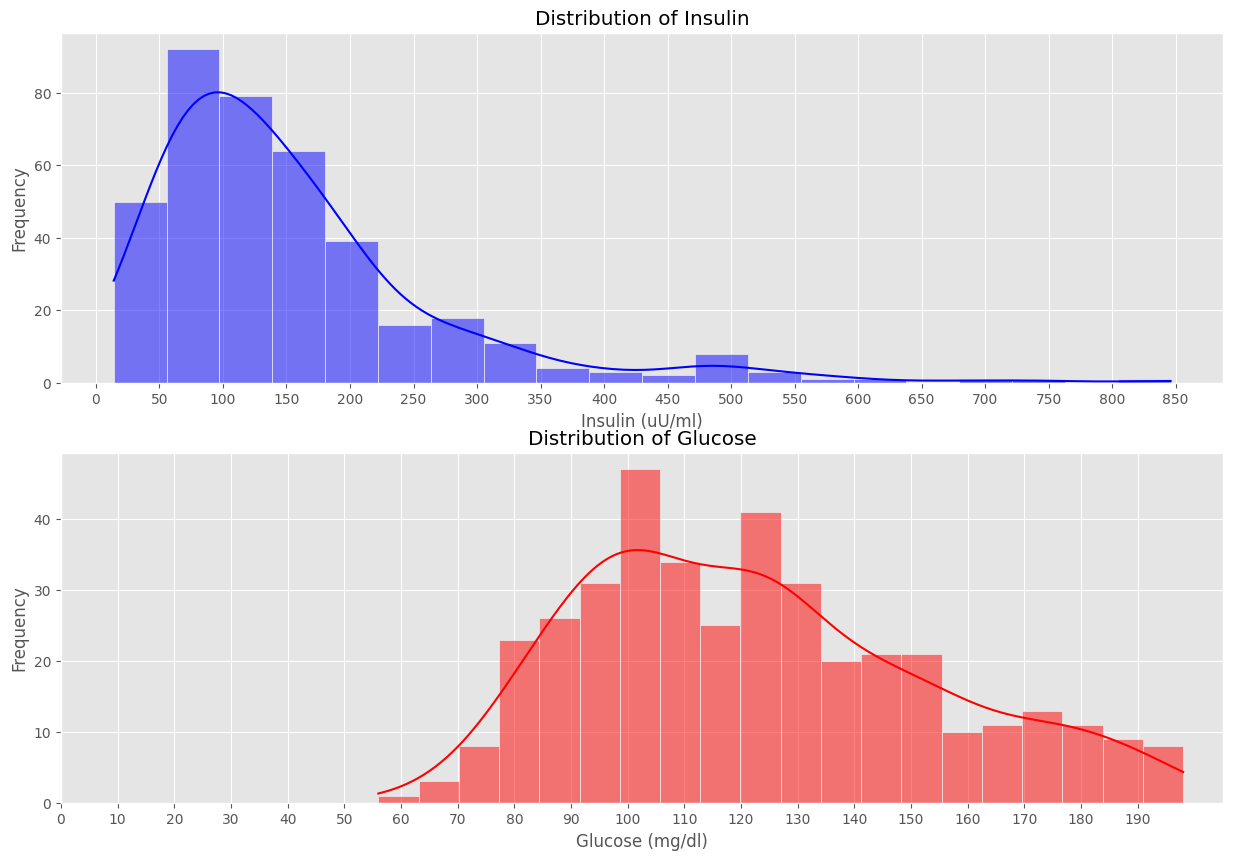

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10)) #creo una grilla de figuras de dos filas por 1 columna
sns.histplot(data=df_nan, x="Insulin", bins=20, kde=True, color="blue", ax=ax[0]) #histograma de Insulin, kde kernel density dibuja la densidad de datos
ax[0].set_title("Distribution of Insulin")
ax[0].set_xlabel("Insulin (uU/ml)")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 900, 50)) #ajuste de escala
sns.histplot(data=df_nan, x="Glucose", bins=20, kde=True, color="red", ax=ax[1]) #histograma de Glucose
ax[1].set_title("Distribution of Glucose")
ax[1].set_xlabel("Glucose (mg/dl)")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 200, 10)) #ajuste de escala
plt.show()


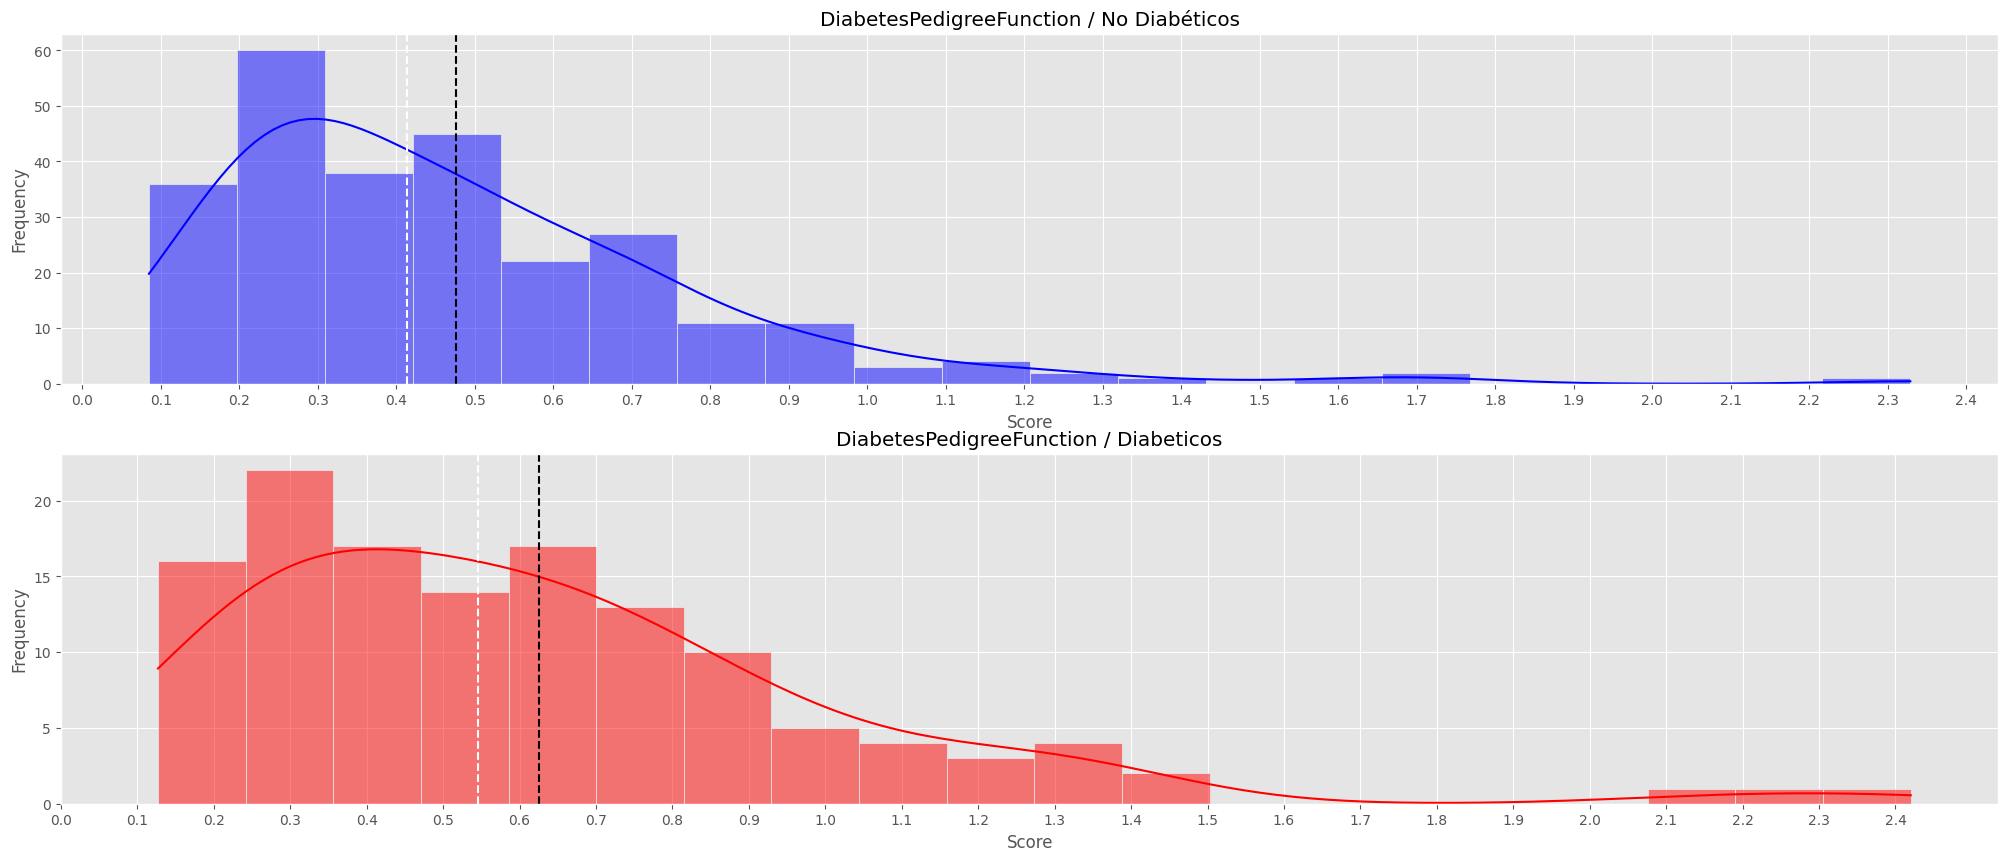

In [24]:
df_no_diabeticos= df_nan[df_nan["Outcome"] == 0] #separo los pacientes no diabeticos

fig, ax = plt.subplots(2, 1, figsize=(25, 10))
sns.histplot(data=df_no_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("DiabetesPedigreeFunction / No Diabéticos")
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 2.5, 0.1))

#agregue 2 lineas para marcar la media y la mediana
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].median(), color="white", linestyle="--", label="Mediana")

#histograma de los pacientes marcados como diabeticos
sns.histplot(data=df_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("DiabetesPedigreeFunction / Diabeticos")
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 2.5, 0.1))

#agregue 2 lineas para marcar la media y la mediana
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].median(), color="white", linestyle="--", label="Mediana")
plt.show()

## Diagrama de caja y bigotes para detectar outliers

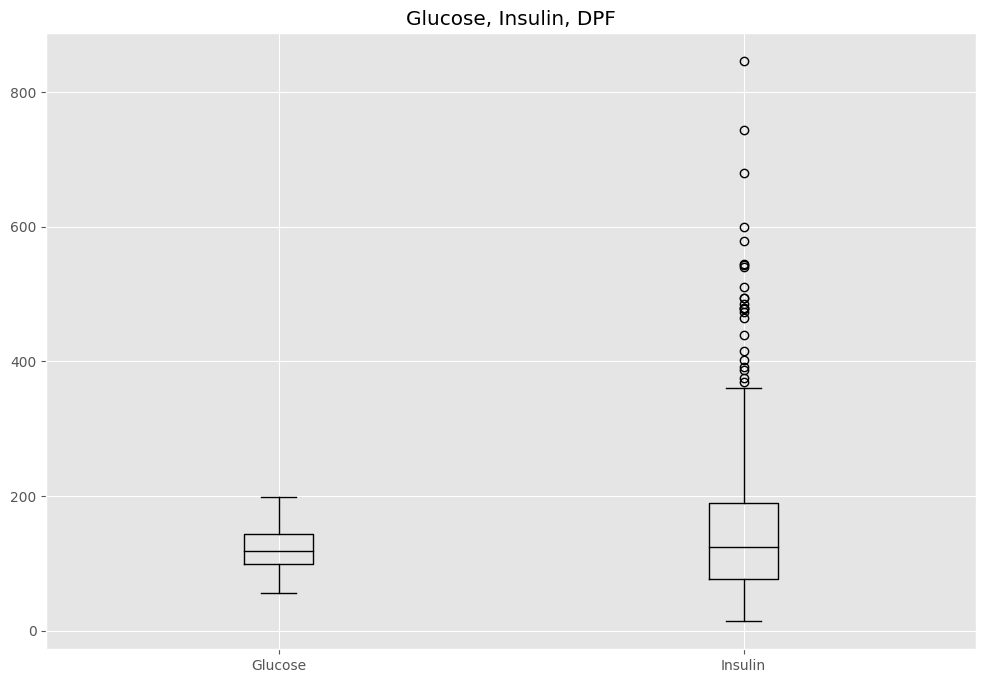

In [25]:
df_nan[['Glucose', 'Insulin']].plot(kind='box', color="k", title='Glucose, Insulin, DPF', figsize=(12, 8))
plt.gca().spines[['top', 'right',]].set_visible(True)


##Realizaremos una separación en clusters todavía en esta instancia exploratoria para intentar ver patrones no tan evidentes, implementamos KMeans

In [26]:
from sklearn.cluster import KMeans #importo libreria
from yellowbrick.cluster import KElbowVisualizer #importo libreria para diagrama de codo en la determinación del numero k.

In [27]:
df_KMeans = df_nan.copy(deep=True) #realizo un copy "profundo" dejando como backup df_nan
df_KMeans.reset_index(inplace=True) #reseteo el indice

#Me quedaré solamente con las variables Glucose, Insulin y DPF para realizar este agrupamiento,
#por lo tanto realizo un drop del resto de las columnas
df_KMeans.drop(columns=["Pregnancies", "BloodPressure", "SkinThickness", "BMI","Age", "Outcome","index"], inplace=True)
df_KMeans #dataframe de trabajo para KMeans


,Glucose,Insulin,DiabetesPedigreeFunction
0,89.0,94.0,0.167
1,137.0,168.0,2.288
2,78.0,88.0,0.248
3,197.0,543.0,0.158
4,189.0,846.0,0.398
...,...,...,...
389,181.0,510.0,0.222
390,128.0,110.0,1.057
391,88.0,16.0,0.766
392,101.0,180.0,0.171


In [28]:
#Voy a estandarizar los datos con el standard scaler
# los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #genero una instancia del Scaler
df_KMeans_scaled = scaler.fit_transform(df_KMeans) #realizo el fit
df_KMeans_scaled

array([[-1.09333323, -0.51884686, -1.02533958],
       [ 0.46794788,  0.10496753,  5.04016543],
       [-1.45112681, -0.5694264 , -0.79370078],
       ...,
       [-1.12585992, -1.17638095,  0.68764368],
       [-0.70301295,  0.20612662, -1.01390063],
       [-0.05247915, -0.36710822, -0.80227999]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

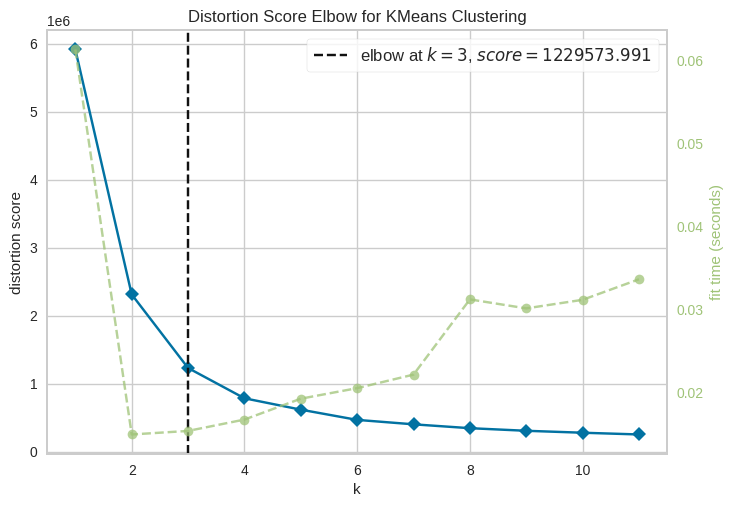

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans() #genero instancia de KMeans
visualizer = KElbowVisualizer(model, k=(1,12)) #generamos instancia del Visualizer
visualizer.fit(df_KMeans)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

In [30]:
# Crear y ajustar el modelo K-means
modelo = KMeans(n_clusters=3, max_iter=1000, init='random', random_state=27) #utilizo el n sugerido por el cambio de pendiente en el gráfico
preds = modelo.fit_predict(df_KMeans_scaled)
preds #preds es un array de una dimension

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0,
       0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,

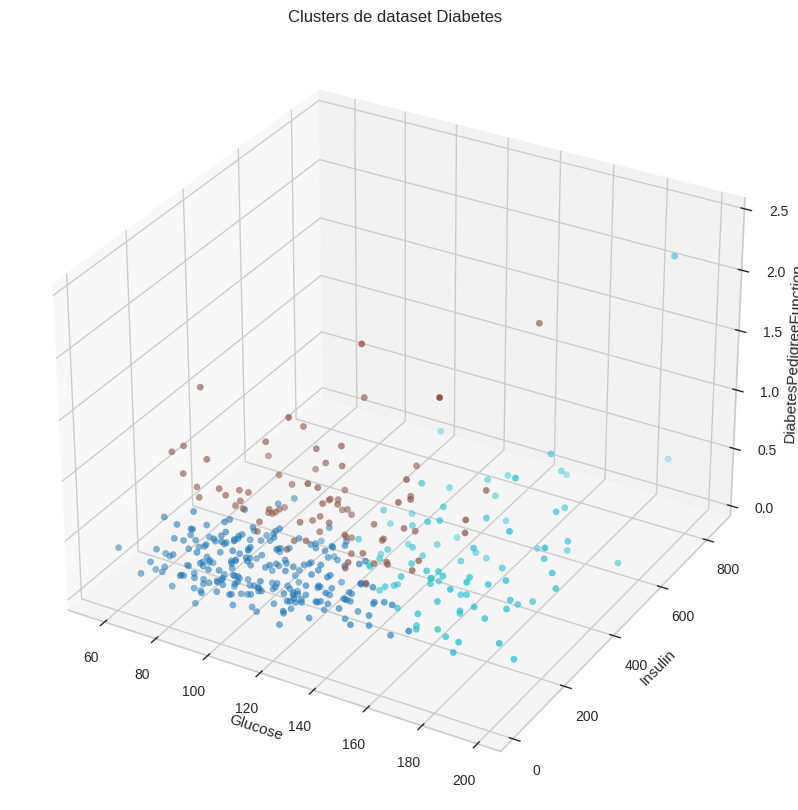

In [31]:
# Este código grafica las variables de interés en 3 dimensiones tomando como
# código de color el array preds de separación de clusters

#importamos las librerias 3d
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

#generamos figura y gráfico 3D
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df_KMeans["Glucose"], df_KMeans["Insulin"], df_KMeans["DiabetesPedigreeFunction"], c=preds, cmap="tab10")
plt.title("Clusters de dataset Diabetes")
ax.set_xlabel("Glucose")
ax.set_ylabel("Insulin")
ax.set_zlabel("DiabetesPedigreeFunction")
plt.show()

In [32]:
## Checkeo de consistencia de dimensiones

print("Valores nulos por variable:\n")
print(df_KMeans.isna().sum(),"\n")
print("Dimensiones:\n")
print("Dimensiones de preds: ",preds.shape)
print("Dimensiones de df_KMeans: ", df_KMeans.shape)
print("Dimensiones de df_KMeans_scaled: ",df_KMeans_scaled.shape)


Valores nulos por variable:

Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
dtype: int64 

Dimensiones:

Dimensiones de preds:  (394,)
Dimensiones de df_KMeans:  (394, 3)
Dimensiones de df_KMeans_scaled:  (394, 3)


In [33]:
#convierto preds en un dataframe y lo concateno a df_KMeans
#se renombra la columna como "cluster"
#concateno Outcome del dataset df_nan
preds=pd.DataFrame(preds)
df_concat=pd.concat([df_KMeans, preds], axis=1)
df_concat=df_concat.rename(columns = {0:'cluster'})
df_concat = df_concat.join(df_nan['Outcome'], how='inner')
df_concat

,Glucose,Insulin,DiabetesPedigreeFunction,cluster,Outcome
3,197.0,543.0,0.158,2,0
4,189.0,846.0,0.398,2,1
6,118.0,230.0,0.551,0,1
8,115.0,96.0,0.529,0,1
13,145.0,110.0,0.245,0,1
...,...,...,...,...,...
388,121.0,74.0,0.261,0,1
389,181.0,510.0,0.222,2,0
390,128.0,110.0,1.057,1,0
392,101.0,180.0,0.171,0,0


In [34]:
#Estadísticas descriptivas considerando los clusters
df_concat.groupby(["cluster"])[["Glucose", "Insulin", "DiabetesPedigreeFunction"]].describe()

Glucose                                                             \
          count        mean        std    min    25%    50%     75%    max   
cluster                                                                      
0         118.0  107.404125  17.665803   68.0   95.0  105.5  118.75  164.0   
1          37.0  126.540541  22.253083   77.0  109.0  125.0  142.00  173.0   
2          49.0  165.265306  18.411699  127.0  154.0  165.0  180.00  198.0   

        Insulin              ...                DiabetesPedigreeFunction  \
          count        mean  ...     75%    max                    count   
cluster                      ...                                           
0         118.0  100.042373  ...  126.75  230.0                    118.0   
1          37.0  150.216216  ...  190.00  278.0                     37.0   
2          49.0  310.653061  ...  440.00  846.0                     49.0   

                                                                
             mean       std    min    25%    50%    75%    max  
cluster                                                         
0        0.372975  0.168342  0.085  0.246  0.349  0.497  0.748  
1        0.994324  0.300265  0.647  0.731  0.962  1.162  1.731  
2        0.499571  0.364094  0.128  0.268  0.398  0.646  2.329  

[3 rows x 24 columns]

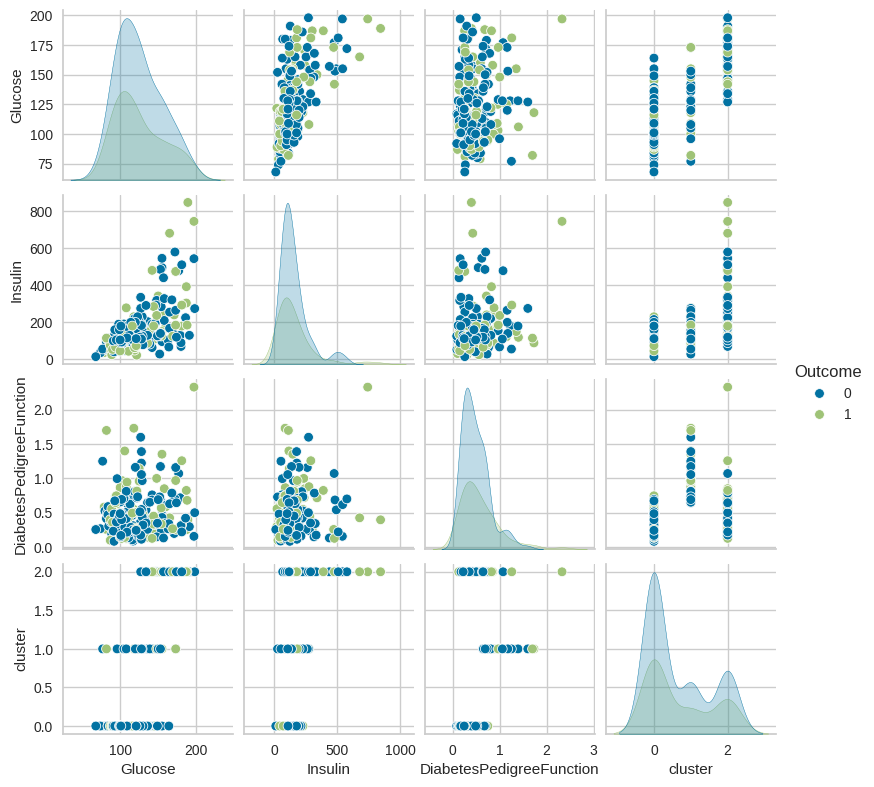

In [35]:
#Otro pairplot para visualizar relaciones
sns.pairplot(df_concat, hue='Outcome', height=2)
plt.show()

Se ven 3 grupos de pacientes, el cluster 0 de proporción de pacientes con valores más sanos y bajos de glucosa e insulina con la DPF también en valores bajos. El cluster 1,
con valores intermedios-altos de glucosa e insulina pero ya con una DPF de media cercana a 1 (que indicaria enfermedad) y, por último, el cluster 2 con los valores más altos de glucosa e insulina y curiosamente una función de pedigree de diabetes intermedia.

In [36]:
#Este snippet de codigo crea 3 dataframes separados por los valores de clusters
#el método isin() filtra la columna cluster usando la lista de (de 1 solo valor)
#que se le pasa como parámetro, se genera una serie de booleanos en donde los
#True corresponden al cluster que se paso el valor. Con esto se indexa df_concat

cluster_0 = df_concat[df_concat.cluster.isin([0])]
cluster_1 = df_concat[df_concat.cluster.isin([1])]
cluster_2 = df_concat[df_concat.cluster.isin([2])]



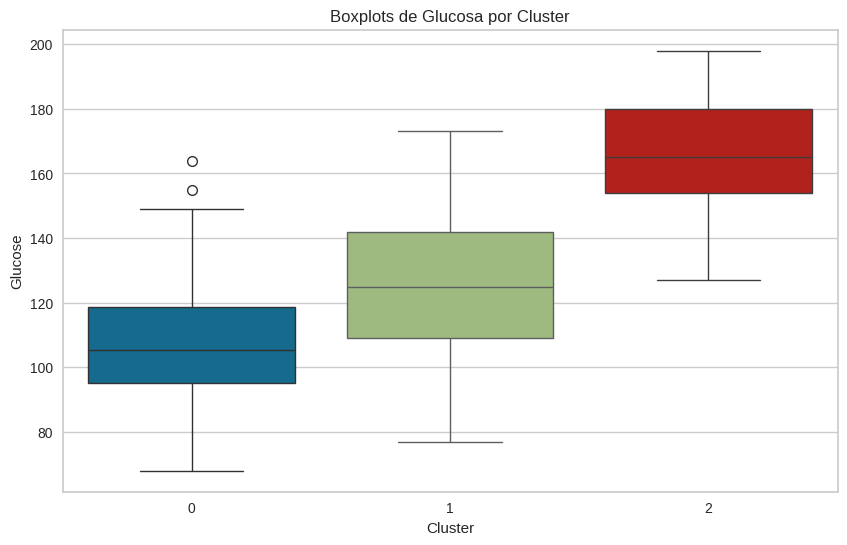

In [37]:
#Diagrama de caja y bigotes por cluster

fig, ax = plt.subplots(figsize=(10, 6))

#Hago un boxplot para cada cluster
sns.boxplot(x="cluster", y="Glucose", data=cluster_0, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_1, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_2, ax=ax)

# Titulos y labels
ax.set_title("Boxplots de Glucosa por Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Glucose")

# mostrar el grafico
plt.show()


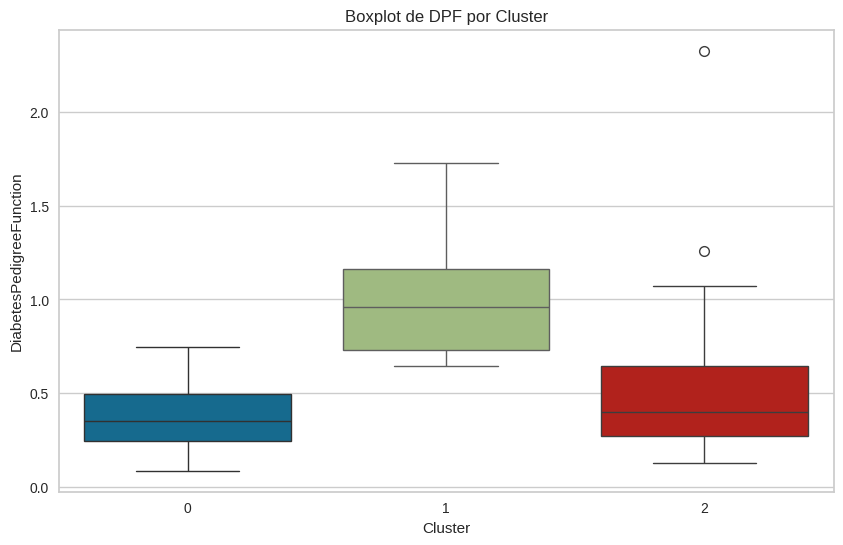

In [38]:
#Misma idea con DPF por cluster

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_0, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_1, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_2, ax=ax)
ax.set_title("Boxplot de DPF por Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("DiabetesPedigreeFunction")
plt.show()


## Resumen y conclusiones EDA

De la **matriz de correlación** se observan en general correlaciones débiles entre las variables. Hay correlación positiva moderada entre Glucose y Outcome, Glucose e Insulin, BMI y SkinThickness. Correlación positiva más fuerte entre cantidad de Pregnancies y Age.

Con los **pairplots y scatter plot** se encuentran algunas relaciones entre las variables que tienen sentido a priori, como número de embarazos y edad, glucosa e insulina, skin thickness y BMI. No impresiona tampoco que la DPF, que varia entre 0.08 y 2.42 incida de manera clara en el Outcome sólo con esa información. Se considera que para personas sanas, esta función debe acercarse a cero.
En cuanto a la insulina y sus **histogramas**, expresada según el paper del estudio en uU/ml, presenta valores muy altos en todo el rango. Mi estimación es que las unidades son incorrectas en el dataset pero la distribución sí lo es.

Se aprecian valores atípicos (**outliers**) en el diagrama de caja de la insulina, es decir, en este caso que superan el valor del tercer cuartil + 1,5 veces la distancia entre Q3 y Q1. Se decide incluirlos en el análisis considerando que la distribución esta fuertemente sesgada hacia la derecha.

Por último, la separación en clusters permite identificar 1 grupo de pacientes más "sanos" y dos grupos con valores elevados y muy elevados de glucemia e insulina, con valores de media cercana a 1 y de media cercana a 0.5 respectivamente para la DPF.

#2-Selección de Variables y Análisis de componentes principales

## Reducción de la dimensionalidad utilizando el método de componentes principales

In [39]:
#Analisis de componentes principales
df_pca =  df_nan.copy(deep=True) #hago una copia del original en df_pca
df_pca.drop(columns=["Outcome"],inplace=True) # remuevo el Outcome (1= diabetico, 0= no diabetico)
df_pca.reset_index(inplace=True) #reseteo el indice
df_pca.drop(columns=["index"], inplace=True) #remuevo la columna index
df_pca

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...,...
389,0,181.0,88.0,44.0,510.0,43.3,0.222,26
390,1,128.0,88.0,39.0,110.0,36.5,1.057,37
391,2,88.0,58.0,26.0,16.0,28.4,0.766,22
392,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [40]:
# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA
model_pca = PCA(n_components=4) # instancio el modelo con 4 componentes en principio
model_pca.fit(df_pca) # entreno el modelo

PCA(n_components=4)

0.9335155854026183


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.002392,0.155453,0.011041,0.016669,0.987350,0.013597,0.000388,0.019584
PC2,0.029264,0.966516,0.132185,0.065031,-0.157907,0.036060,0.001014,0.130587
PC3,0.063476,-0.186351,0.770228,0.456305,0.003358,0.280543,0.000659,0.284715
PC4,0.089556,-0.042605,0.427440,-0.736140,0.012440,-0.379001,-0.004622,0.348912


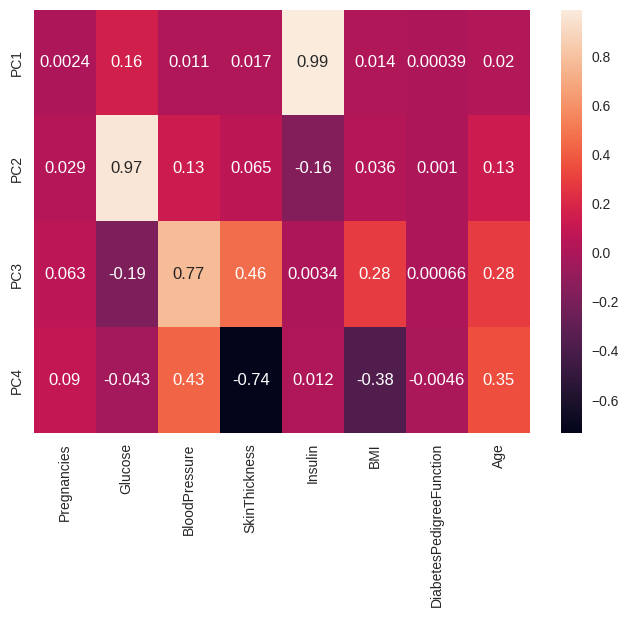

In [43]:
print(model_pca.explained_variance_ratio_[0]) #analizo que la primera componente principal, explica el 93% de la varianza!
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']

#DataFrame cnon las componentes como dato, las columnas del dataset con las variabes, indexado  por la lista_componentes
componentes = pd.DataFrame(data=model_pca.components_, columns = df_pca.columns, index=lista_componentes)
ax = sns.heatmap(componentes, annot=True)
componentes

Vemos que Insulin y Glucose tienen mucho peso en las PC1 y PC2 respectivamente, BloodPressure en la PC3 y SkinThickness en la PC4.

In [42]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_

print(lista_componentes)
print(model_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[93.  4.  1.  1.]


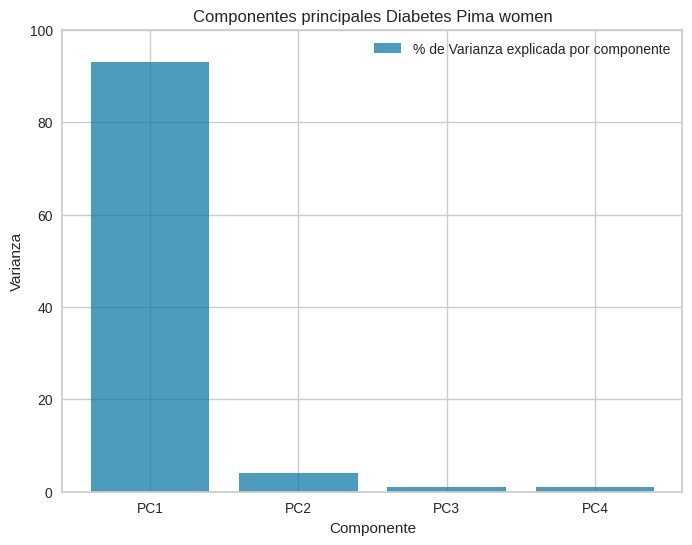

In [ ]:
#Mostramos en grafico de barras la cantidad de varianza porcentual que explica
#cada componente principal.

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(lista_componentes, model_pca.explained_variance_ratio_.round(2)*100, alpha=0.7, label='% de Varianza explicada por componente')
ax.set_title('Componentes principales Diabetes Pima women')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 100)
ax.legend()

In [44]:
#genero las proyecciones calculando para cada instancia del dataset sus componentes principales y lo guardamos en un dataframe.
proyecciones = pd.DataFrame(model_pca.transform(df_pca), index=df_pca.index,columns=lista_componentes)

#La PC1 ya supera el umbral de 80% y explica un 93% de la varianza, me quedo con PC1 y PC2
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)

#reseteo el index, imprimo el dataframe
proyecciones.reset_index(inplace=True)
proyecciones.drop(columns=["index"], inplace=True)
print(proyecciones)

            PC1        PC2
0    -66.413543 -25.309659
1     14.462455   8.822396
2    -73.932092 -35.707465
3    394.768178  14.427985
4    692.324287 -43.162291
..          ...        ...
389  359.520974   3.366220
390  -43.615770  16.199722
391 -143.594344 -14.650575
392   21.800459 -18.422696
393  -43.440488   4.793543

[394 rows x 2 columns]


In [45]:
# Agrego la columna outcome al dataframe proyecciones
df_nan.reset_index(inplace=True) #reseteo el index, imprimo el dataframe
df_nan.drop(columns=["index"], inplace=True)
proyecciones['Outcome'] = df_nan['Outcome'] # tienen el mismo index
proyecciones


,PC1,PC2,Outcome
0,-66.413543,-25.309659,0
1,14.462455,8.822396,1
2,-73.932092,-35.707465,1
3,394.768178,14.427985,1
4,692.324287,-43.162291,1
...,...,...,...
389,359.520974,3.366220,1
390,-43.615770,16.199722,1
391,-143.594344,-14.650575,0
392,21.800459,-18.422696,0


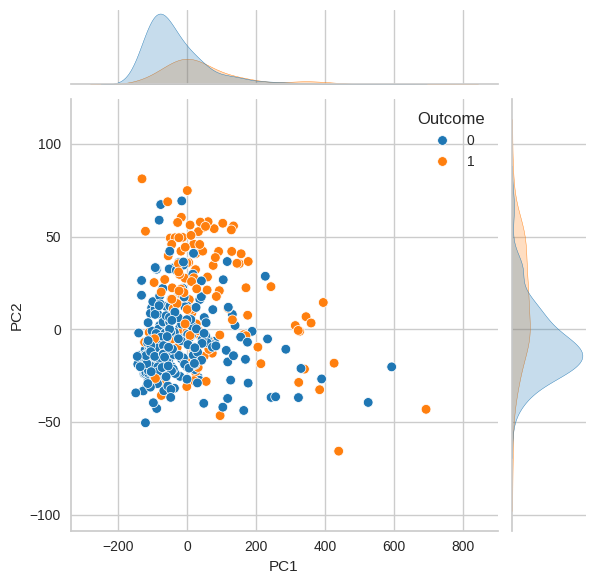

In [46]:
# Grafico de la relacion de las componentes principales con un jointplot, muestra los histogramas
#de la distribución de las dos variables y un scatter para mostrar relaciones.

g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="Outcome", palette="tab10")
g.fig.set_figwidth(6)


In [47]:
proyecciones.Outcome.value_counts() #las clases estan desbalanceadas, no obstante estudiare el comportamiento de KNN

Outcome
0    264
1    130
Name: count, dtype: int64

#3 y 4) Comparación y selección de algoritmos de clasificación. Métricas y validadción.

## K-nearest neighbors (KNN)

In [48]:
#importamos el clasificador de KNN, train_test_split para separar el modelo,
# metricas, reporte de calsificación y matriz de confusión.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
#definimos los features y los targets

proyecciones_features=proyecciones[["PC1", "PC2"]]
proyecciones_target=proyecciones[["Outcome"]]
print(proyecciones_features)
print( proyecciones_target)

            PC1        PC2
0    -66.413543 -25.309659
1     14.462455   8.822396
2    -73.932092 -35.707465
3    394.768178  14.427985
4    692.324287 -43.162291
..          ...        ...
389  359.520974   3.366220
390  -43.615770  16.199722
391 -143.594344 -14.650575
392   21.800459 -18.422696
393  -43.440488   4.793543

[394 rows x 2 columns]
    Outcome
0         0
1         1
2         1
3         1
4         1
..      ...
389       1
390       1
391       0
392       0
393       0

[394 rows x 1 columns]


In [51]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(proyecciones_features,proyecciones_target,test_size=0.3, random_state=7)
# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors=3) #utilizo n=3 para "desempatar potencialemente ya que el resultado de Otcome es binario"
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [53]:
#comparo las metricas de los datos de enrenamiento y test de KNN
preds_train = modelo.predict(X_train)
preds_test = modelo.predict(X_test)

#Imprimo las metricas con los datos de testeo
print(metrics.classification_report(y_test, preds_test))

#Imprimo las métricas con los datos de train, para tener otra referencia
print(metrics.classification_report(y_train, preds_train))


              precision    recall  f1-score   support

           0       0.76      0.82      0.79        79
           1       0.59      0.50      0.54        40

    accuracy                           0.71       119
   macro avg       0.68      0.66      0.67       119
weighted avg       0.71      0.71      0.71       119

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       185
           1       0.84      0.74      0.79        90

    accuracy                           0.87       275
   macro avg       0.86      0.84      0.85       275
weighted avg       0.87      0.87      0.87       275



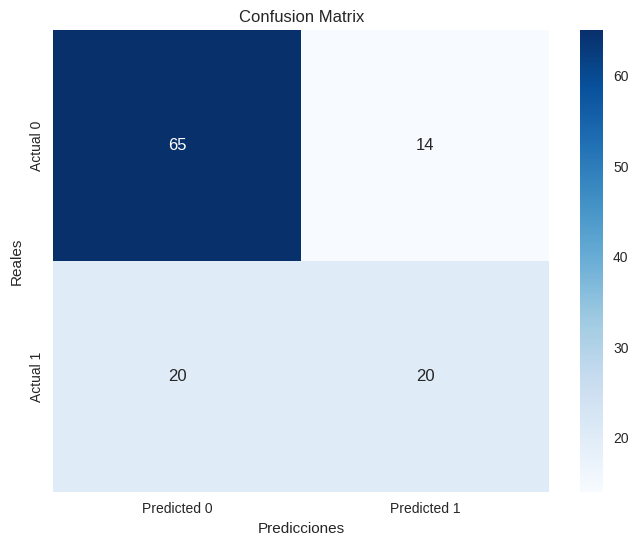

In [55]:
#Matriz de confusión (datos de test)

# tomo y_test como valores verdaderos y preds_test como las predicciones


# Calculo de la matriz
cm = confusion_matrix(y_test, preds_test)

# Heatmap f
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

#Labels y título
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Confusion Matrix')

plt.show()



El modelo KNN en este caso tiene baja precisión y sensibilidad para los casos verdaderos outcomes=1, por eso para esta clase su F1-Score es bajo, no la detecta bien. Sí, detecta mejor los verdaderos negativos, F1-Score de 0.79

##Regresión Logística

In [56]:
#importo librería
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42) #instancio el modelo
model_lr.fit(X_train, y_train) #entreno
y_pred_lr = model_lr.predict(X_test) #realizamos las predicciones con test

#Imprimo los resultados de Exactitud o Accuracy
print('Logistic Regression Accuracy (test data):', accuracy_score(y_test, y_pred_lr))

y_pred_lr = model_lr.predict(X_train) #predicciones con train como ref

print('Logistic Regression Accuracy (train data):', accuracy_score(y_train, y_pred_lr))

y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy (test data): 0.7563025210084033
Logistic Regression Accuracy (train data): 0.7818181818181819
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        79
           1       0.70      0.47      0.57        40

    accuracy                           0.76       119
   macro avg       0.74      0.69      0.70       119
weighted avg       0.75      0.76      0.74       119



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


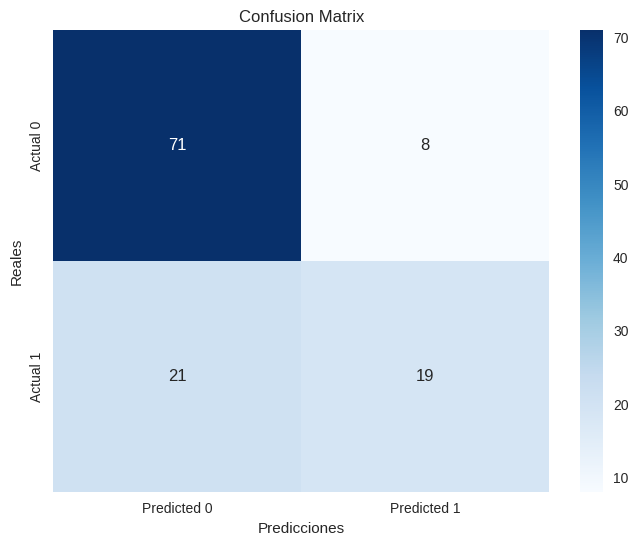

In [57]:
#Matriz de confusión (datos de test) Regresión logístiva

# tomo y_test como valores verdaderos y y_pred_lr como las predicciones


# Calculo de la matriz
cm = confusion_matrix(y_test, y_pred_lr)

# Heatmap f
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

#Labels y título
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Confusion Matrix')

plt.show()

Accuracy de 0.76, F1 Score 0.83 y 0.57 para las clases con outcome 0 y 1 respectivamente. La regresión Logística tuvo una performance mejor pero el modelo sigue teniendo dificultad para detectar el Outcome 1.

In [64]:
# Entrenamos un modelo de regresión logística con las variables originales
model_lr = LogisticRegression()
model_lr.fit(df_nan.drop('Outcome', axis=1), df_nan['Outcome'])

# Predecimos el resultado para un nuevo paciente ficticio
nuevo_paciente = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [140],
    'BloodPressure': [90],
    'SkinThickness': [33],
    'Insulin': [40],
    'BMI': [31],
    'DiabetesPedigreeFunction': [0.9],
    'Age': [46]
})

prediccion = model_lr.predict(nuevo_paciente)

# Imprimimos el resultado de la predicción
if prediccion[0] == 0:
    print('El paciente no tiene diabetes')
else:
    print('El paciente tiene diabetes')


El paciente tiene diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Glucose, BMI y BloodPressure presentan una distribución relativamente simétrica, consistente con los resulatados de los coeficientes de variación. Se aprecian valores de insulina muy elevados, que no se condicen en principio con valores fisiológicos (se intentará buscar más información)

# 5) Conclusiones



El desarrollo del trabajo